In [17]:
#Подключаем необходимые библиотеки
import sys
sys.path.append("..")

import math
import random

import matplotlib.pyplot as plt
import numpy as np

from lowess import lowess_method
from Task_2_1_NonparametricRegression_NadarayaWatson.nadaraya_watson import nadaraya_watson

from math_lib import Kernel, sse

In [24]:
# Генерируем данные для тренировки

# Вопросы
x = np.arange(1, 10, 0.1)
# Оригинальные ответы
y = np.zeros(x.size)
# Ответы с помехами
noise_y = np.zeros(x.size)

for i in range(y.size):
    y[i] = x[i]
    # Оригинальные ответы + шум
    noise_y[i] = x[i] + (math.sin(x[i]) * 4) * random.random() + (random.random() * 15 if random.random() < 0.20 else 0.)

[Gaussian K] LOWESS
SSE 61.934020521148476
[Quartic K] LOWESS
SSE 50.44317280481383


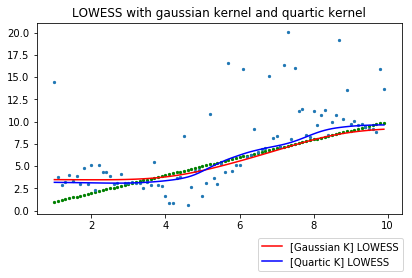

In [108]:
"""
Сравнение Гауссовского Ядра и Квартичнского, методом LOWESS
Подобрана оптимальная ширина окна под оба ядра, количество проходов - 10
"""

# Выводим оригинальные данные и данные и шумом
plt.scatter(x, y, s=5, color='green')
plt.scatter(x, noise_y, s=5)

h = 1.4 # Устанавливаем ширину окна
result2 = lowess_method(x, noise_y, 10, h=h, kernel=Kernel.gaussian)

print("[Gaussian K] LOWESS")
print("SSE %r" % sse(y, result2))
plt.plot(x, result2, label='[Gaussian K] LOWESS', color='red')

h = 2.0 # Устанавливаем ширину окна
result3 = lowess_method(x, noise_y, 10, h=h, kernel=Kernel.quartic)

print("[Quartic K] LOWESS")
print("SSE %r" % sse(y, result3))
plt.plot(x, result3, label='[Quartic K] LOWESS', color='blue')


plt.legend(bbox_to_anchor=(1.017, -0.1))
plt.tight_layout(pad=1.7)
plt.title("LOWESS with gaussian kernel and quartic kernel")

plt.show()

[Quartic K] Nadaraya-Watson
SSE 205.42048696862662
[Quartic K] LOWESS
SSE 203.29938688294354


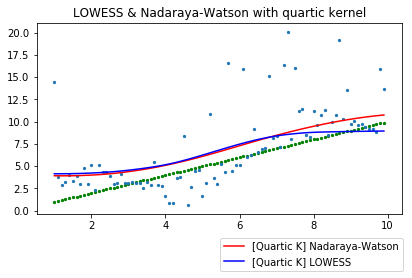

In [94]:
"""
Сравнение метода Надарая Ватсона и метода LOWESS с использованием Квартического Ядра
Подобрана оптимальная ширина окна и кол-во проходов у LOWESS
"""

# Выводим оригинальные данные и данные и шумом
plt.scatter(x, y, s=5, color='green')
plt.scatter(x, noise_y, s=5)

# Генерируем данные методом Надарая Ватсона
h = 5.2 # Устанавливаем ширину окна
result = np.zeros(x.size)
for i in range(x.size):
    result[i] = nadaraya_watson(x[i], x, noise_y, h=h, kernel=Kernel.quartic)

print("[Quartic K] Nadaraya-Watson")
print("SSE %r" % sse(y, result))
plt.plot(x, result, label='[Quartic K] Nadaraya-Watson', color='red')

h = 5.7 # Устанавливаем ширину окна
# Количество проходов - 10
result1 = lowess_method(x, noise_y, 10, h=h, kernel=Kernel.quartic)

print("[Quartic K] LOWESS")
print("SSE %r" % sse(y, result1))
plt.plot(x, result1, label='[Quartic K] LOWESS', color='blue')

plt.legend(bbox_to_anchor=(1.017, -0.1))
plt.tight_layout(pad=1.7)
plt.title("LOWESS & Nadaraya-Watson with quartic kernel")
plt.show()

[Quartic K] Nadaraya-Watson
SSE 214.9928906650976
[Gaussian K] LOWESS
SSE 131.3315693963047


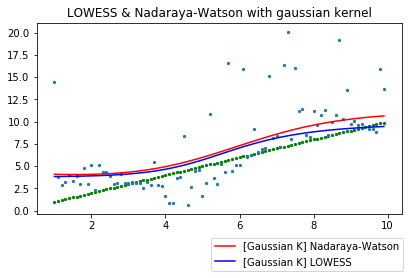

In [115]:
"""
Сравнение метода Надарая Ватсона и метода LOWESS с использованием Гауссовского Ядра
Подобрана оптимальная ширина окна и кол-во проходов у LOWESS
"""

# Выводим оригинальные данные и данные и шумом
plt.scatter(x, y, s=5, color='green')
plt.scatter(x, noise_y, s=5)

h = 2.0 # Устанавливаем ширину окна
result = np.zeros(x.size)
for i in range(x.size):
    result[i] = nadaraya_watson(x[i], x, noise_y, h=h, kernel=Kernel.gaussian)

print("[Quartic K] Nadaraya-Watson")
print("SSE %r" % sse(y, result))
plt.plot(x, result, label='[Gaussian K] Nadaraya-Watson', color='red')

h = 2.0 # Устанавливаем ширину окна
result1 = lowess_method(x, noise_y, 2, h=h, kernel=Kernel.gaussian)

print("[Gaussian K] LOWESS")
print("SSE %r" % sse(y, result1))
plt.plot(x, result1, label='[Gaussian K] LOWESS', color='blue')

plt.legend(bbox_to_anchor=(1.017, -0.1))
plt.tight_layout(pad=1.7)
plt.title("LOWESS & Nadaraya-Watson with gaussian kernel")
plt.show()

In [117]:
#Как можно увидеть у LOWESS данные по среднеквадратичной ошибке лучше за счет кол-ва проходов